In [1]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/student-depression-dataset/Student Depression Dataset.csv'  # Update with the correct path
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# Display the first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check the distribution of the target variable
if 'target_column_name' in df.columns:  # Replace with the actual target column name
    print("\nTarget Variable Distribution:")
    print(df['target_column_name'].value_counts())


Dataset Shape: (27901, 18)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration              

In [2]:
df['Financial Stress'].fillna(df['Financial Stress'].mean(), inplace=True)  # Replace with mean
# Alternatively, you can use median:
# df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)


In [3]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'Gender' and 'Have you ever had suicidal thoughts ?' (binary columns)
df['Gender'] = le.fit_transform(df['Gender'])
df['Have you ever had suicidal thoughts ?'] = le.fit_transform(df['Have you ever had suicidal thoughts ?'])
df['Family History of Mental Illness'] = le.fit_transform(df['Family History of Mental Illness'])


In [4]:
# Apply One-Hot Encoding to categorical columns with more than two categories
df = pd.get_dummies(df, columns=['City', 'Profession', 'Degree', 'Dietary Habits'])


In [5]:
# Map 'Sleep Duration' to numerical values
sleep_duration_mapping = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3
}
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_duration_mapping)


In [6]:
# Features (X) and target (y)
X = df.drop(columns=['Depression', 'id'])  # Drop 'Depression' (target) and 'id' (not useful)
y = df['Depression']  # Target variable


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
xgb_model = XGBClassifier(random_state=42)

# Fit the model
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8300


In [10]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1834  509]
 [ 440 2798]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2343
           1       0.85      0.86      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581



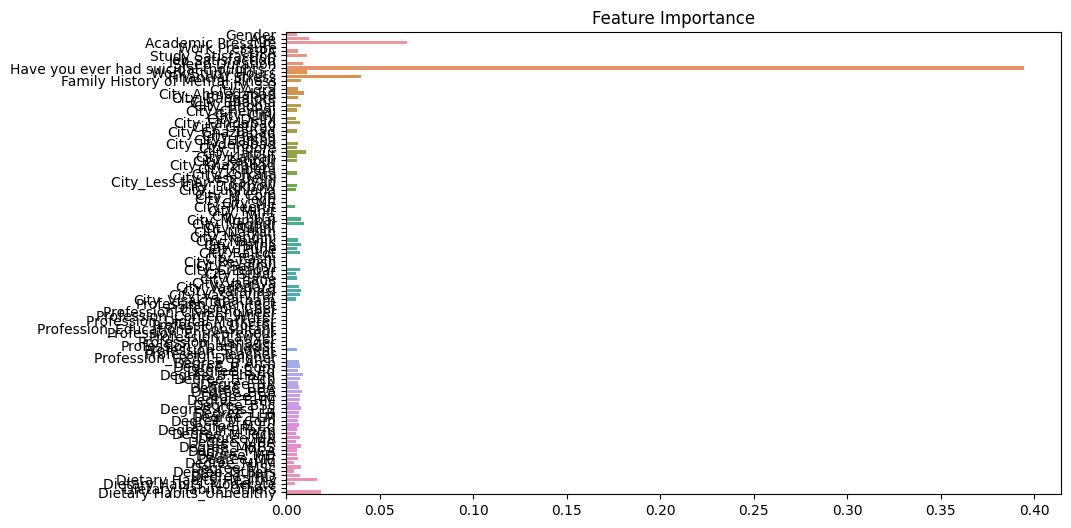

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = xgb_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X_train.columns)
plt.title("Feature Importance")
plt.show()


In [12]:
import joblib

# Save the model
joblib.dump(xgb_model, 'xgb_model.pkl')

# Load the model later
# xgb_model = joblib.load('xgb_model.pkl')


['xgb_model.pkl']